In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
data = pd.read_csv('SINASC_RO_2019.CSV') 

In [5]:
bins = [0, 3, 5, 7, 10] 
labels = ['asfixia grave', 'asfixia moderada', 'asfixia leve', 'normal']  
data['APGAR5_categoria'] = pd.cut(data['APGAR5'], bins=bins, labels=labels, include_lowest=True) 
print(data[['APGAR5', 'APGAR5_categoria']].head())

   APGAR5 APGAR5_categoria
0    10.0           normal
1     9.0           normal
2    10.0           normal
3    10.0           normal
4    10.0           normal


3) Monte um gráfico comparando a distribuição de APGAR5 por sexo para cada grupo de tempo de gestação (GESTACAO).

<Figure size 1400x800 with 0 Axes>

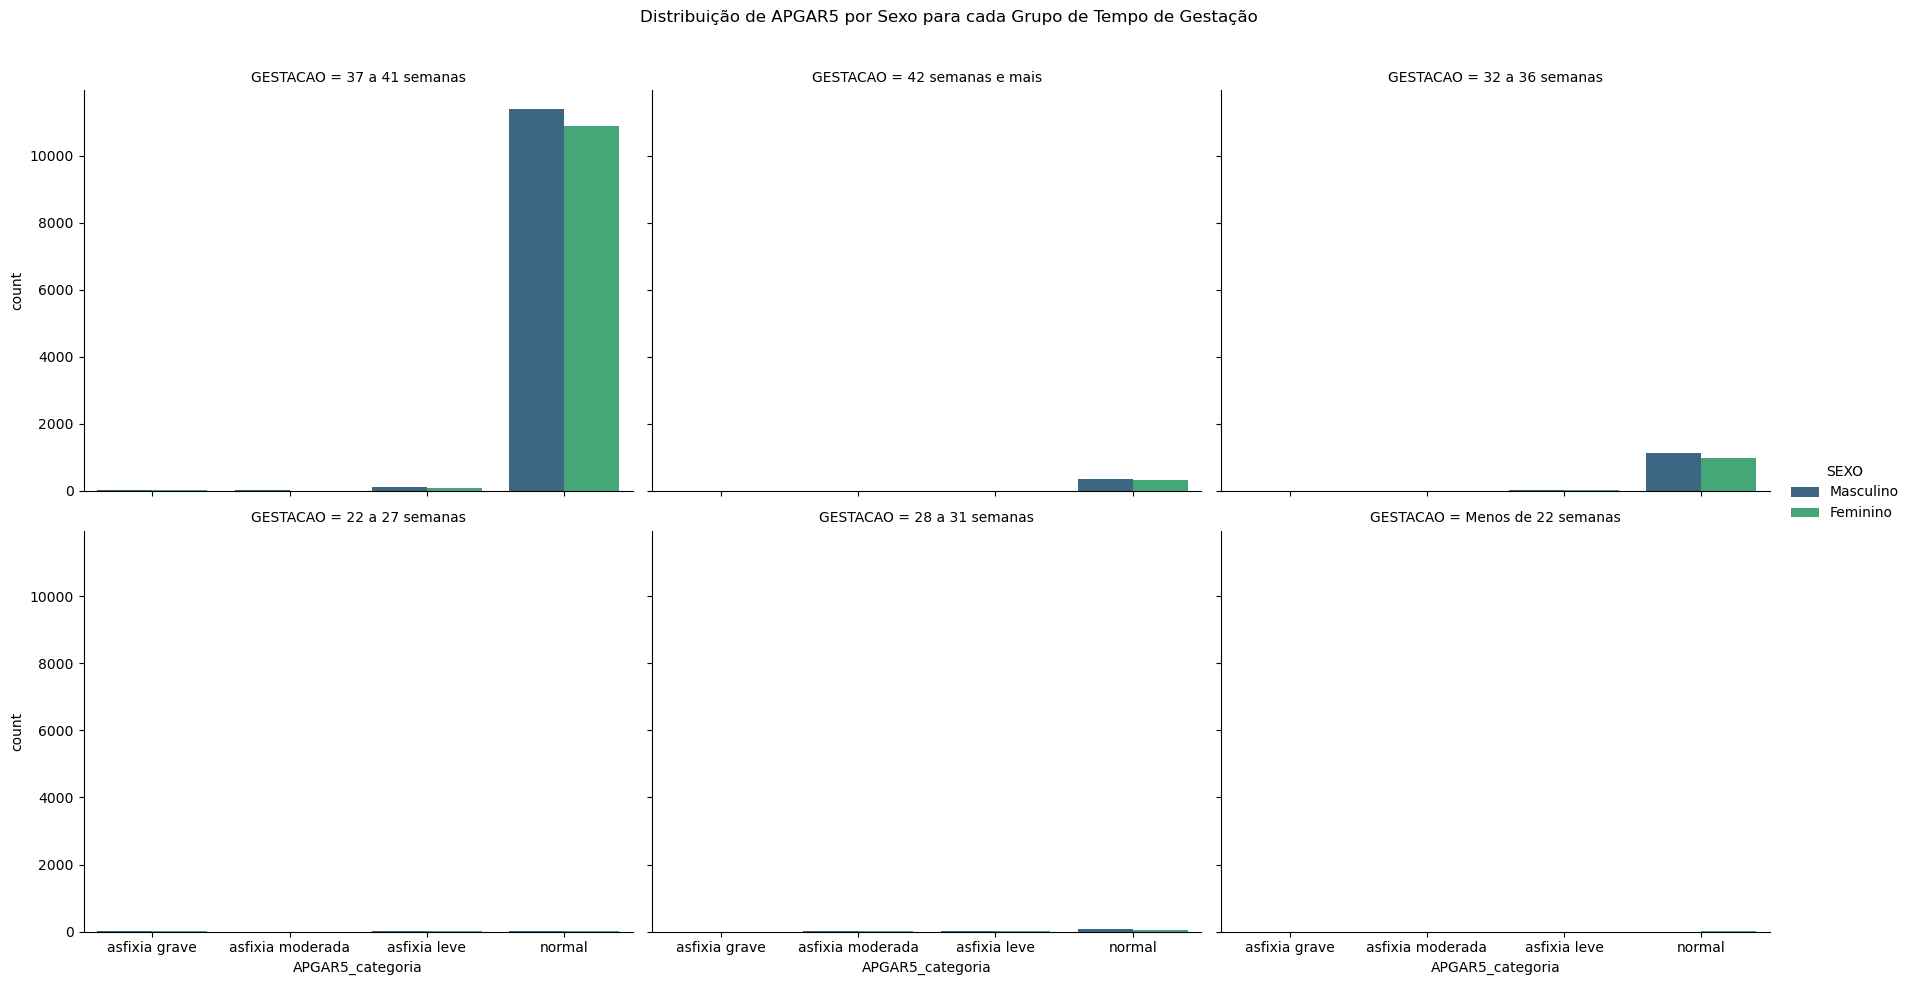

In [6]:
plt.figure(figsize=(14, 8))
sns.catplot( 
    data=data, 
    x='APGAR5_categoria',
    hue='SEXO', 
    col='GESTACAO',
    kind='count', 
    palette='viridis', 
    col_wrap=3, height=5, 
    aspect=1.2 
)
plt.subplots_adjust(top=0.9) 
plt.suptitle('Distribuição de APGAR5 por Sexo para cada Grupo de Tempo de Gestação') 
plt.show()

4) Monte uma tabela cruzada com APGAR5 nas colunas e GESTACAO nas linhas

In [7]:
tabela_cruzada = pd.crosstab(data['GESTACAO'], data['APGAR5_categoria']) 
print(tabela_cruzada)

APGAR5_categoria     asfixia grave  asfixia moderada  asfixia leve  normal
GESTACAO                                                                  
22 a 27 semanas                 21                 1            12      51
28 a 31 semanas                  3                12            18     129
32 a 36 semanas                  8                19            73    2134
37 a 41 semanas                 33                28           196   22266
42 semanas e mais                1                 1             6     690
Menos de 22 semanas              2                 0             1       4


5) Da tabela cruzada do intem anterior, calcule os percentuais de linha. Ou seja, a distribuição da variável APGAR5 para cada classe de GESTACAO dado.

In [8]:
percentuais_linha = tabela_cruzada.apply(lambda x: x / x.sum(), axis=1)  
print(percentuais_linha)

APGAR5_categoria     asfixia grave  asfixia moderada  asfixia leve    normal
GESTACAO                                                                    
22 a 27 semanas           0.247059          0.011765      0.141176  0.600000
28 a 31 semanas           0.018519          0.074074      0.111111  0.796296
32 a 36 semanas           0.003581          0.008505      0.032677  0.955237
37 a 41 semanas           0.001465          0.001243      0.008702  0.988589
42 semanas e mais         0.001433          0.001433      0.008596  0.988539
Menos de 22 semanas       0.285714          0.000000      0.142857  0.571429


6) Os médicos costumam classificar parto prematuro quando a gestação tem menos que 37 semanas. Faça um gráfico de barras da tabela cruzada acima e conclua se você acha que este conjunto de dados corrobora ou não com a afirmação dos médicos.

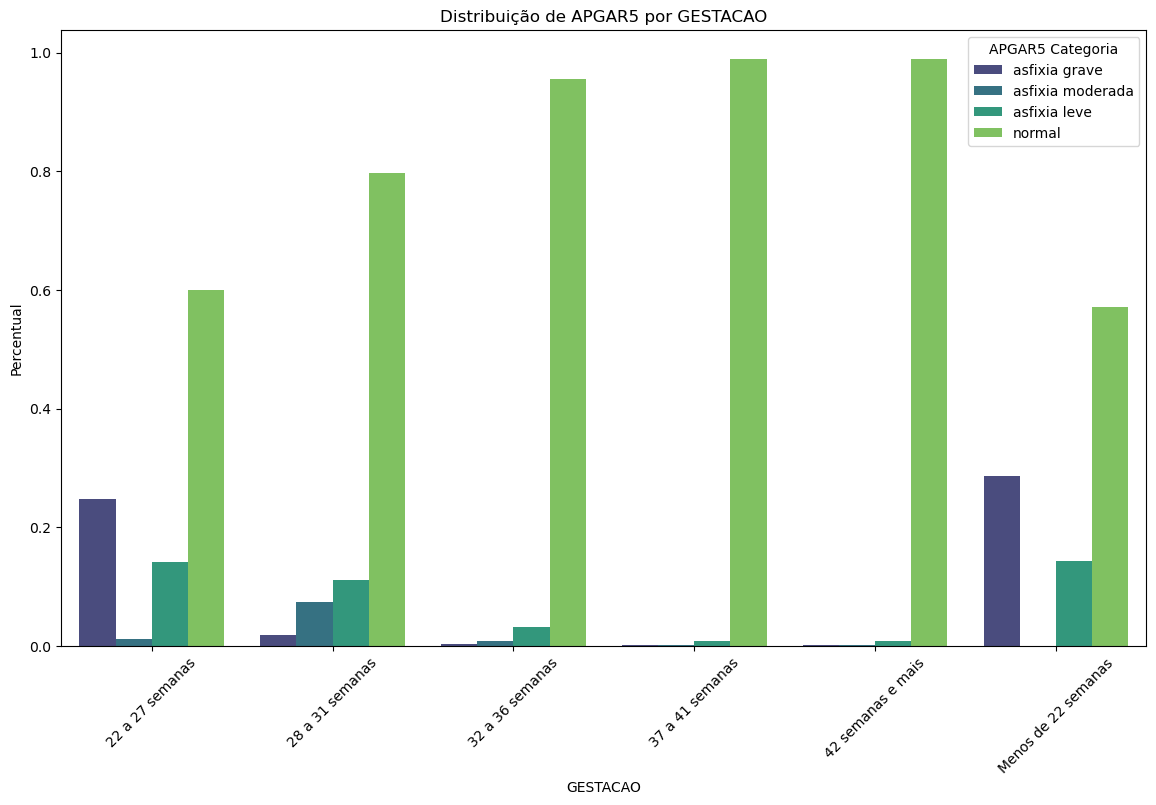

In [11]:
percentuais_linha_long = percentuais_linha.reset_index().melt(id_vars='GESTACAO', var_name='APGAR5_categoria', value_name='Percentual')
plt.figure(figsize=(14, 8)) 
sns.barplot(x='GESTACAO', y='Percentual', hue='APGAR5_categoria', data=percentuais_linha_long, palette='viridis') 
plt.title('Distribuição de APGAR5 por GESTACAO') 
plt.xlabel('GESTACAO') 
plt.ylabel('Percentual') 
plt.xticks(rotation=45) 
plt.legend(title='APGAR5 Categoria') 
plt.show()

 7) Veja se há relação entre APGAR5 e o peso do bebê. Isso pode ser feito de diversas formas. Fique à vontade para escolher a melhor maneira na sua opinião, ou até testar mais de um dos gráficos que vimos. Fique à vontade também para consultar a documentação e utilizar algum outro recurso se achar conveniente.

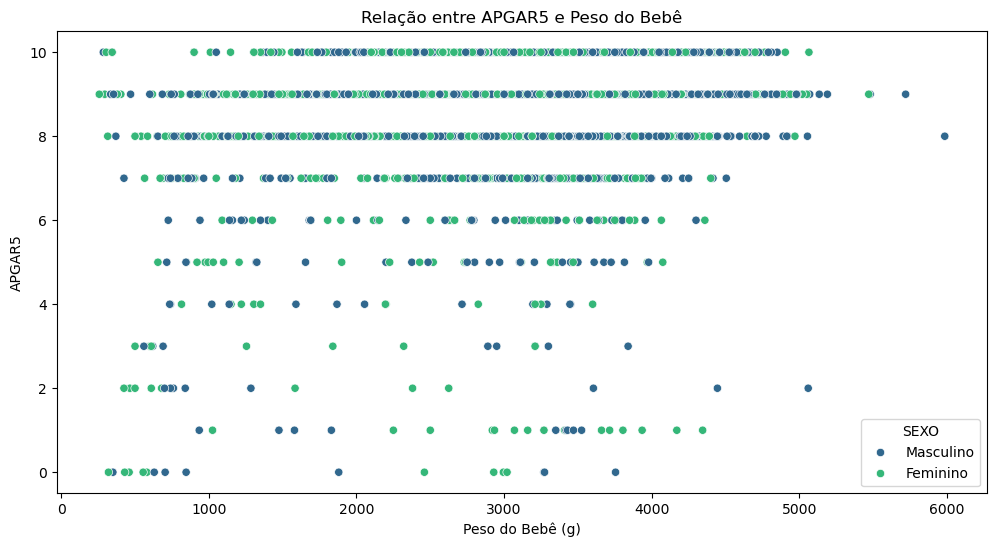

In [13]:
plt.figure(figsize=(12, 6)) 
sns.scatterplot(x='PESO', y='APGAR5', data=data, hue='SEXO', palette='viridis') 
plt.title('Relação entre APGAR5 e Peso do Bebê') 
plt.xlabel('Peso do Bebê (g)') 
plt.ylabel('APGAR5')
plt.show()

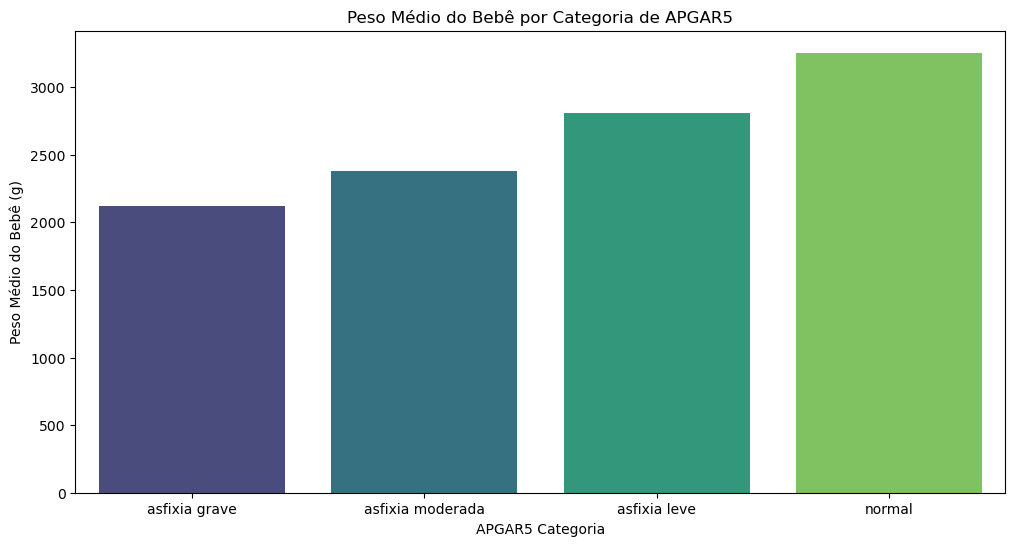

In [15]:
plt.figure(figsize=(12, 6))
sns.barplot(x='APGAR5_categoria', y='PESO', hue='APGAR5_categoria', data=data, palette='viridis', errorbar=None, legend=False)
plt.title('Peso Médio do Bebê por Categoria de APGAR5') 
plt.xlabel('APGAR5 Categoria') 
plt.ylabel('Peso Médio do Bebê (g)') 
plt.show()